# 🚜predicting the sale price of Bulldozers using Machine Learning Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [2]:
# import training and validation set
df =pd.read_csv("Data/bluebook-for-bulldozers/TrainAndValid.csv",
               low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [5]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

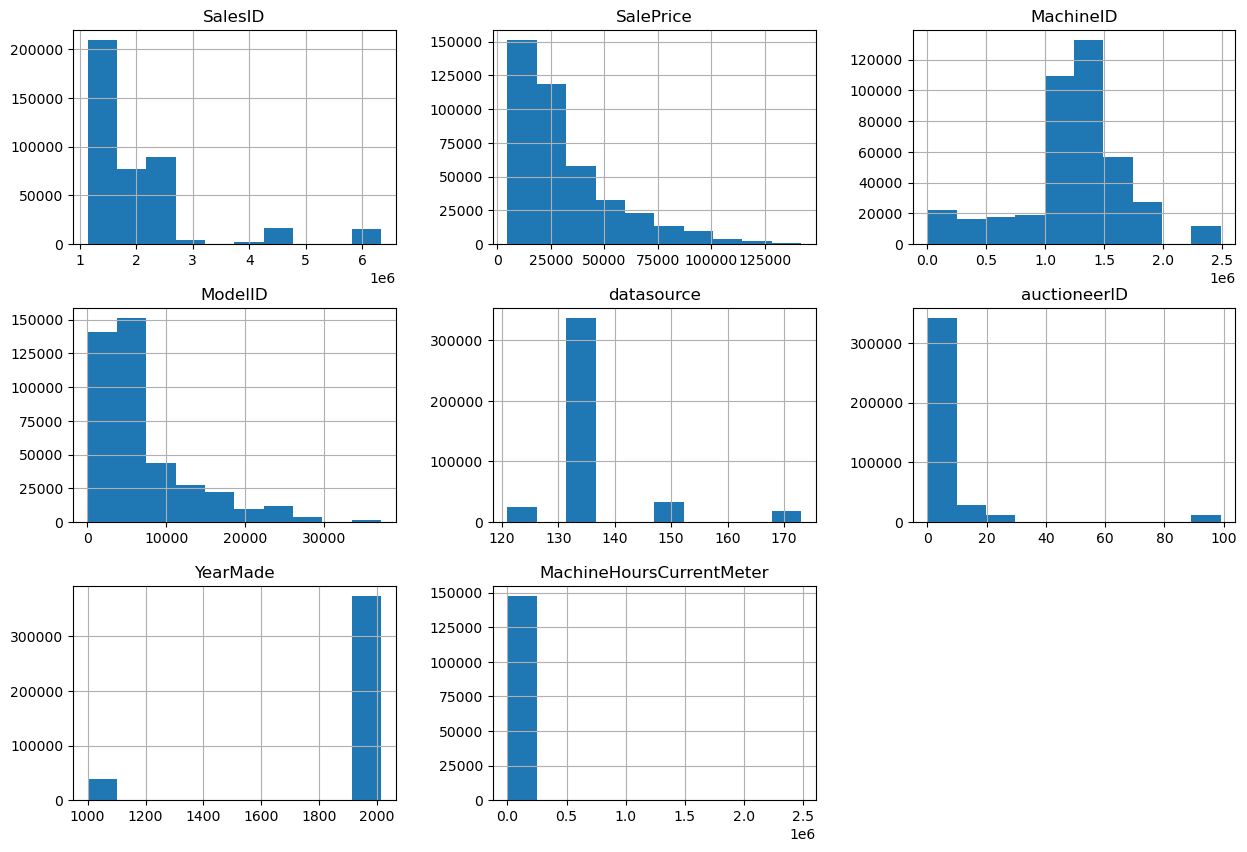

In [6]:
df.hist(figsize=(15,10))
plt.show()

In [7]:
df.saledate.dtype

dtype('O')

In [8]:
df = pd.read_csv("Data/bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory=False,
                parse_dates=["saledate"])
df.saledate.dtype

dtype('<M8[ns]')

In [9]:
df.saledate[:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

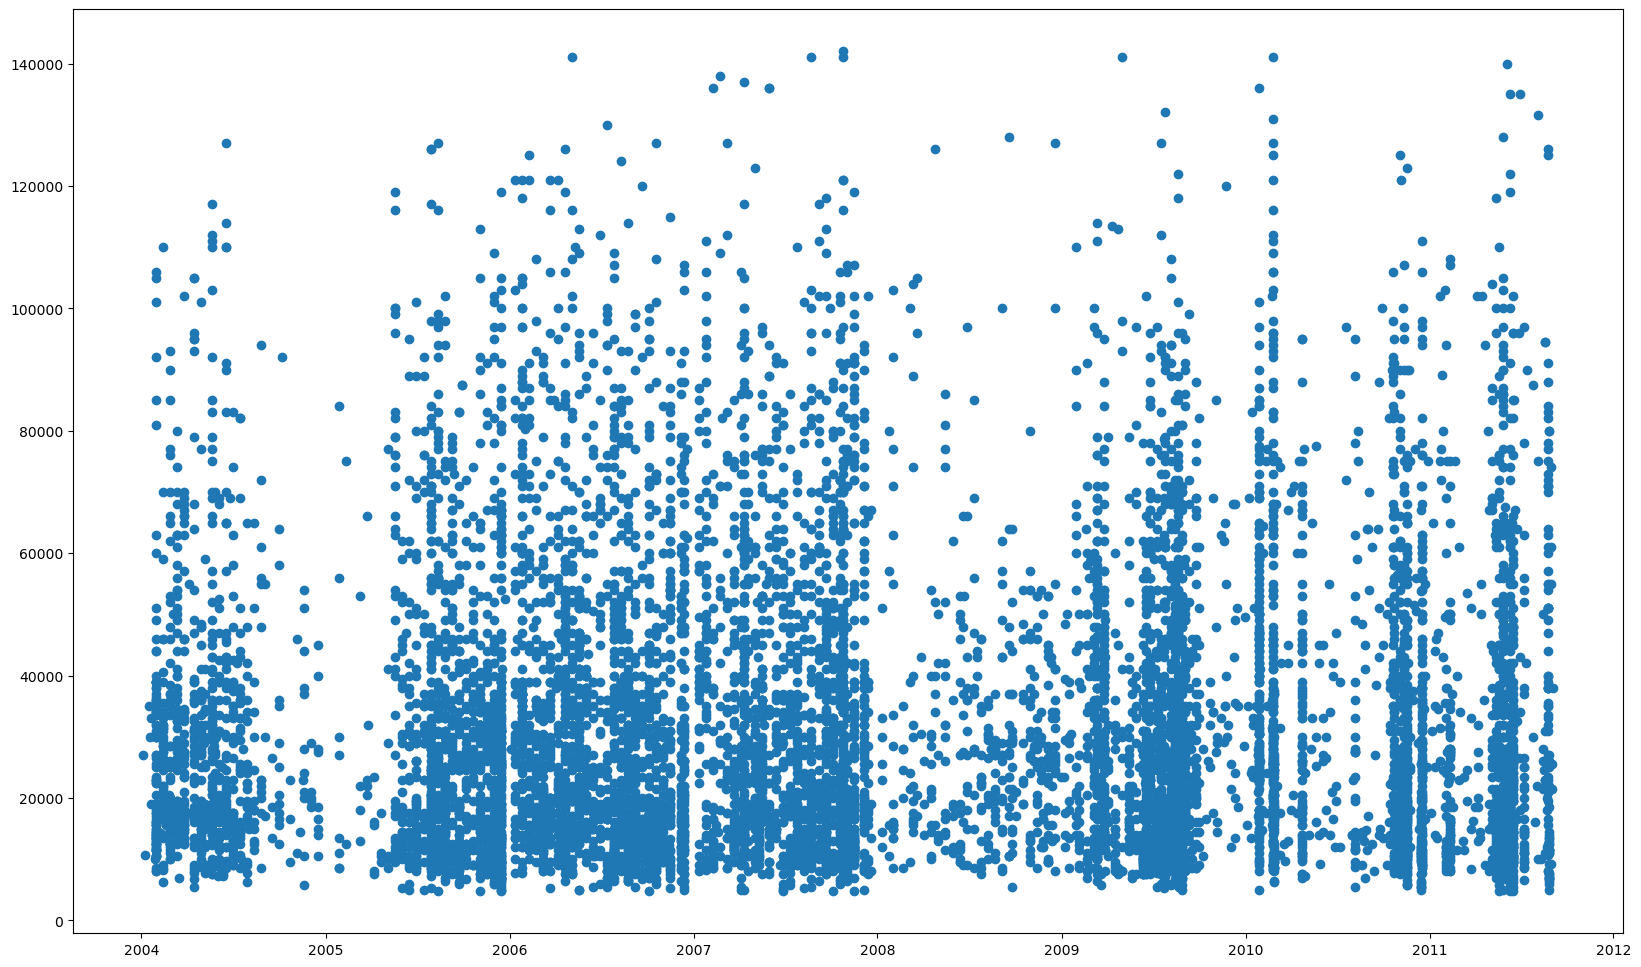

In [10]:
fig, ax = plt.subplots(figsize=(20,12))
ax.scatter(df["saledate"][:10000], df["SalePrice"][:10000])
plt.show()

In [11]:
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

In [12]:
## sort dataframe in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [13]:
df_temp = df.copy()

## Add daytime parameter in saledate

In [14]:
df_temp[:1]["saledate"].dt.year

205615    1989
Name: saledate, dtype: int32

In [15]:
df_temp[:1]["saledate"].dt.day

205615    17
Name: saledate, dtype: int32

In [16]:
df_temp["saleYear"] = df_temp["saledate"].dt.year
df_temp["saleMonth"] = df_temp["saledate"].dt.month
df_temp["saleDay"] = df_temp["saledate"].dt.day
df_temp["saleDayOfWeek"] = df_temp.saledate.dt.dayofweek
df_temp["saleDayOfYear"] = df_temp.saledate.dt.dayofyear

In [17]:
df_temp[:1].T

,205615
SalesID,1646770
SalePrice,9500.0
MachineID,1126363
ModelID,8434
datasource,132
auctioneerID,18.0
YearMade,1974
MachineHoursCurrentMeter,NaN
UsageBand,NaN
saledate,1989-01-17 00:00:00


In [18]:
## removing saledate
df_temp.drop("saledate", axis=1, inplace=True)

## Modelling

In [19]:
df_temp["UsageBand"].dtype

dtype('O')

## convert string to categories

In [20]:
pd.api.types.is_object_dtype(df_temp["UsageBand"])

True

In [21]:
for label, content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [22]:
for label, content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [23]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [24]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [25]:
df_temp.to_csv("Data/bluebook-for-bulldozers/modeified_train_test.csv", index=False)

In [26]:
df_tmp =pd.read_csv("Data/bluebook-for-bulldozers/modeified_train_test.csv",
                   low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


## Filling missng values

## Filling numrical missing values

In [27]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [28]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            ## Add a binary colum which tells us if the data was missing
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing value
            df_tmp[label] = content.fillna(content.median())

## Filling categorical values

In [29]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label, end="     ")

UsageBand     fiSecondaryDesc     fiModelSeries     fiModelDescriptor     ProductSize     Drive_System     Enclosure     Forks     Pad_Type     Ride_Control     Stick     Transmission     Turbocharged     Blade_Extension     Blade_Width     Enclosure_Type     Engine_Horsepower     Hydraulics     Pushblock     Ripper     Scarifier     Tip_Control     Tire_Size     Coupler     Coupler_System     Grouser_Tracks     Hydraulics_Flow     Track_Type     Undercarriage_Pad_Width     Stick_Length     Thumb     Pattern_Changer     Grouser_Type     Backhoe_Mounting     Blade_Type     Travel_Controls     Differential_Type     Steering_Controls     

In [30]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content): 
        ## Add a binary colum which tells us if the data was missing
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Fill missing value
        df_tmp[label] = pd.Categorical(content).codes+1

In [31]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [32]:
len(df_tmp)

412698

## ML Model

In [33]:
%%time
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

CPU times: user 8min 49s, sys: 2.89 s, total: 8min 52s
Wall time: 1min 12s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [34]:
# score the model
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9875468079970562

# Spliting data into train_validation sets

In [35]:
df_temp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [36]:
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]
len(df_train), len(df_val)

(401125, 11573)

In [37]:
## Split data into X and y
from sklearn.model_selection import train_test_split

x_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
x_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

# Building an evaluation function

In [38]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
def rmsle(y_test, y_preds):
    """
    Calculate root mean square log error between predition and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    score = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Valid MAE": mean_absolute_error(y_valid, val_preds),
        "Training RMSLE": rmsle(y_train, train_preds),
        "Valid RMSLE": rmsle(y_valid, val_preds),
        "Training R^2": r2_score(y_train, train_preds),
        "Valid R^2": r2_score(y_valid, val_preds)
    }
    return score

## Testing model

In [39]:
%%time
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10000)
model.fit(x_train, y_train)

CPU times: user 17.8 s, sys: 200 ms, total: 18 s
Wall time: 2.58 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [40]:
show_scores(model)

{'Training MAE': np.float64(5561.2988092240585),
 'Valid MAE': np.float64(7177.26365505919),
 'Training RMSLE': np.float64(0.257745378256977),
 'Valid RMSLE': np.float64(0.29362638671089003),
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

# Tunning Huperparameter with `RandomizedSearchCV`

In [41]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rs_grid = {
    "n_estimators": np.arange(10,100, 10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [0.5, 1, "sqrt", "auto"],
    "max_samples": [100000]
    }
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                             param_distributions = rs_grid,
                             n_iter=200,
                             cv=5,
                             verbose=True
                             )
rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/Users/sumanyadav/Desktop/DataScience/ml_course/sample_project/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
270 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sumanyadav/Desktop/DataScience/ml_course/sample_project/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sumanyadav/Desktop/DataScience/ml_course/sample_project/env/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/sumanyad

CPU times: user 1h 50min 38s, sys: 1min, total: 1h 51min 38s
Wall time: 17min 23s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=200,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [100000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [42]:
rs_model.best_params_

{'n_estimators': np.int64(60),
 'min_samples_split': np.int64(10),
 'min_samples_leaf': np.int64(1),
 'max_samples': 100000,
 'max_features': 0.5,
 'max_depth': None}

In [43]:
show_scores(rs_model)

{'Training MAE': np.float64(4038.5029624097374),
 'Valid MAE': np.float64(6132.175866065509),
 'Training RMSLE': np.float64(0.1934770650571831),
 'Valid RMSLE': np.float64(0.2546659804368494),
 'Training R^2': 0.9240130907044971,
 'Valid R^2': 0.8764629975592625}

## Train a model with best hyperparameter

In [44]:
%%time
ideal_model = RandomForestRegressor(
     n_jobs = -1,
     random_state=42,
     n_estimators = 60,
     min_samples_split = 10,
     min_samples_leaf = 1,
     max_samples = None,
     max_features = 0.5,
     max_depth = None
)

ideal_model.fit(x_train, y_train)

CPU times: user 2min 15s, sys: 772 ms, total: 2min 16s
Wall time: 19.4 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=7,
                      min_samples_split=10, n_estimators=60, n_jobs=-1,
                      random_state=42)

In [45]:
show_scores(ideal_model)

{'Training MAE': np.float64(3501.375168655115),
 'Valid MAE': np.float64(5988.388000575649),
 'Training RMSLE': np.float64(0.17040285655836515),
 'Valid RMSLE': np.float64(0.24484782922365525),
 'Training R^2': 0.9406578122256848,
 'Valid R^2': 0.8782057650317889}

In [46]:
show_scores(rs_model)

{'Training MAE': np.float64(4038.5029624097374),
 'Valid MAE': np.float64(6132.175866065509),
 'Training RMSLE': np.float64(0.1934770650571831),
 'Valid RMSLE': np.float64(0.2546659804368494),
 'Training R^2': 0.9240130907044971,
 'Valid R^2': 0.8764629975592625}

## Making Prediction on test data

In [47]:
df_test = pd.read_csv("Data/bluebook-for-bulldozers/Test.csv",
                     low_memory=False,
                     parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [48]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [49]:
print(df_test.shape), print(x_train.shape)

(12457, 52)
(401125, 102)


(None, None)

## Reprocessing the data

In [50]:
def preprocess_data(df):
    df["saleYear"] = df["saledate"].dt.year
    df["saleMonth"] = df["saledate"].dt.month
    df["saleDay"] = df["saledate"].dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear

    df.drop("saledate", axis=1, inplace=True)

    ## fill numrical missing data
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
            ## Add a binary colum which tells us if the data was missing
                df[label+"_is_missing"] = pd.isnull(content)
            # Fill missing value
                df[label] = content.fillna(content.median())

    ## Fill categorical missing data and converting into numr
        if not pd.api.types.is_numeric_dtype(content): 
        ## Add a binary colum which tells us if the data was missing
            df[label+"_is_missing"] = pd.isnull(content)
        # Fill missing value
            df[label] = pd.Categorical(content).codes+1

    
    return df

In [51]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [52]:
# finding how the columns differ using sets
set(x_train.columns)- set(df_test.columns)

{'auctioneerID_is_missing'}

In [53]:
df_test["auctioneerID_is_missing"] = False

In [54]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [55]:
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [56]:
def align_features(test_df, training_columns, fill_value=0):
    """
    Align test dataframe features to match training features
    
    Parameters:
    test_df: DataFrame to align
    training_columns: List of column names from training data
    fill_value: Value to use for missing features
    
    Returns:
    DataFrame with features aligned to training data
    """
    aligned_df = test_df.copy()
    
    # Add missing features
    for col in training_columns:
        if col not in aligned_df.columns:
            aligned_df[col] = fill_value
            print(f"Added missing feature: {col}")
    
    # Select and reorder to match training
    aligned_df = aligned_df[training_columns]
    
    return aligned_df

In [57]:
df_test_final = align_features(df_test, x_train.columns, fill_value=0)
test_preds = ideal_model.predict(df_test_final)
test_preds

array([17847.61531676, 17173.34362484, 47079.19001814, ...,
       12288.69238316, 15784.56954848, 27068.97905829], shape=(12457,))

In [58]:
## Format prediction into same format kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17847.615317
1,1227844,17173.343625
2,1227847,47079.190018
3,1227848,74569.265777
4,1227863,51140.293016
...,...,...
12452,6643171,40564.144199
12453,6643173,10870.528713
12454,6643184,12288.692383
12455,6643186,15784.569548


## Feature important

In [59]:
ideal_model.feature_importances_

array([3.21968702e-02, 1.92954110e-02, 3.87574327e-02, 2.03371271e-03,
       2.38971820e-03, 2.12822182e-01, 2.47816715e-03, 8.19561938e-04,
       4.52747945e-02, 4.08816920e-02, 6.60959489e-02, 4.59142460e-03,
       1.67104602e-02, 1.61211989e-01, 4.44391593e-02, 4.57735758e-03,
       2.98440044e-03, 1.52901518e-03, 3.88513077e-03, 5.99625430e-02,
       4.64625934e-04, 1.77530217e-04, 6.22099285e-04, 2.63615038e-04,
       1.11031415e-03, 1.46739842e-05, 2.78000870e-03, 7.64117532e-03,
       3.11289944e-03, 1.67706722e-03, 4.18445734e-03, 3.47914677e-03,
       2.85513541e-03, 2.58524184e-03, 1.79881585e-03, 4.29698703e-03,
       8.76320622e-04, 1.73156015e-02, 1.93873047e-03, 2.82303030e-03,
       1.02464443e-03, 8.26149298e-04, 1.52321184e-03, 4.82614169e-04,
       4.64557187e-04, 2.17182324e-04, 1.53531164e-04, 2.13854972e-03,
       9.27942443e-04, 2.40506734e-04, 1.69559417e-04, 7.27464552e-02,
       3.42101880e-03, 4.18417051e-03, 2.05856676e-03, 8.15069687e-03,
      

In [85]:
## ploting feature importance
def plot_feature(columns, importances, n=None):
    df = (pd.DataFrame({
        "features": columns,
        "feature_importances": importances})
        .sort_values("feature_importances", ascending=False)
        .reset_index(drop=True))
    # plot dataframe
    fig, ax = plt.subplots(figsize=(15,30))
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importances")
    plt.show()

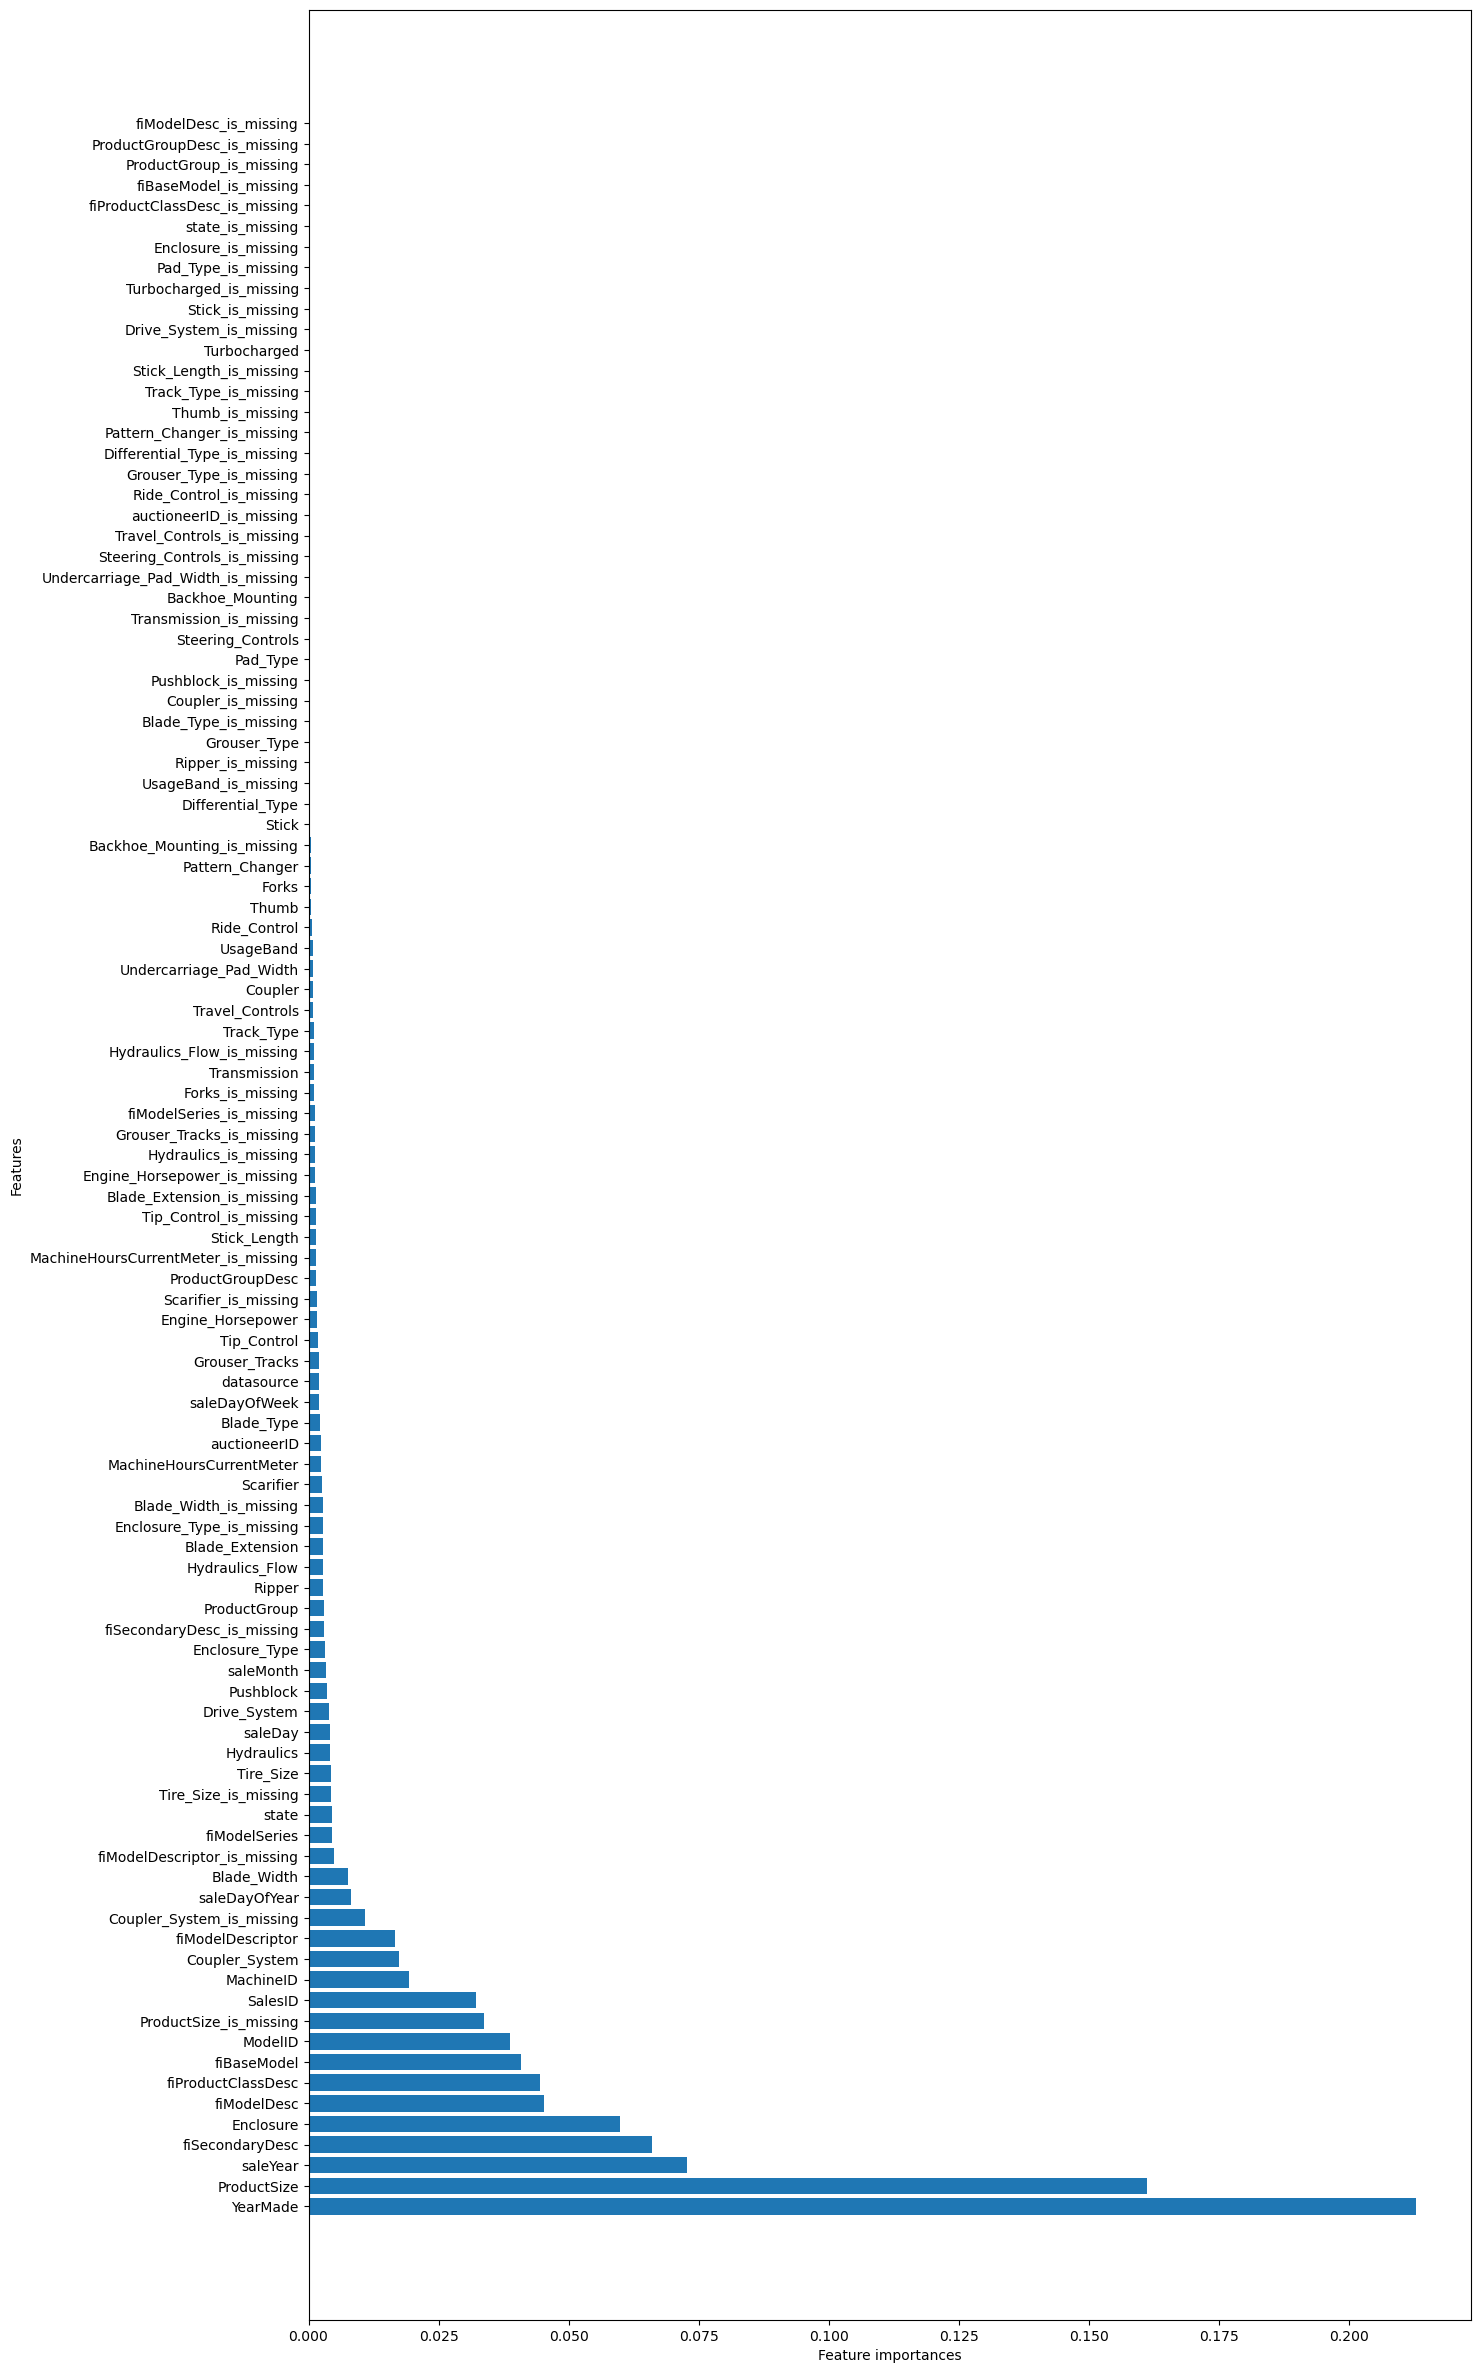

In [86]:
plot_feature(x_train.columns, ideal_model.feature_importances_, n=len(df_test_final))